In [1]:
from h5glance import H5Glance

import os
import sys
import h5py
import math
import numpy  as np
import pandas as pd

from scipy import stats

from lgdo import LH5Store #If this fails, try pip install legend-pydataobj
import lgdo.lh5_store as lh5

import matplotlib.pyplot as plt

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('/Users/romoluque_c/Repositories/BACON_romo/')
sys.path.append(repository_path)

import fit_functions as fitf

In [3]:
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"]      = 13

In [9]:
dsp_path = "/Users/romoluque_c/LEGEND/BSM_LEGEND/low_energy/data_p06/dsp/"

In [10]:
example_dsp_file = f'{dsp_path}/cal/r005/l200-p06-r005-cal-20230717T130655Z-tier_dsp.lh5'

In [6]:
H5Glance(example_dsp_file)

/Users/romoluque_c/LEGEND/BSM_LEGEND/low_energy/data_p06/dsp/cal/r005//l200-p06-r005-cal-20230717T130655Z-tier_dsp.lh5/
├ch1104000	(1 children)
└ch1104001	(1 children)

In [7]:
def load_dsp_data_example(f_dsp, channel):

    tb_name = f'{channel}/raw'
    n_rows  = np.inf #to read all
    store   = LH5Store()
    
    # read non-wf cols (lh5 Arrays)
    data_dsp, n_tot = store.read_object(tb_name, f_dsp, n_rows=n_rows)

    # declare output table (must specify n_rows for size)
    tb_raw = lh5.Table(size=n_tot)

    for col in data_dsp.keys():
        newcol = lh5.Array(data_dsp[col].nda, attrs=data_dsp[col].attrs)
        tb_raw.add_field(col, newcol)
        
    df_dsp = tb_raw.get_dataframe()
    
    return df_dsp

def load_all_dsps(dir_dsp, channel):
    
    df_all_dsp = pd.DataFrame({})
    
    tb_name = f'{channel}/raw'
    n_rows  = np.inf #to read all
    store   = LH5Store()
    
    for filename in os.listdir(dir_dsp):
        data_dsp, n_tot = store.read_object(tb_name, dir_dsp+filename, n_rows=n_rows)

        # declare output table (must specify n_rows for size)
        tb_raw = lh5.Table(size=n_tot)
    
        for col in data_dsp.keys():
            newcol = lh5.Array(data_dsp[col].nda, attrs=data_dsp[col].attrs)
            tb_raw.add_field(col, newcol)
            
        df_dsp     = tb_raw.get_dataframe()
        df_all_dsp = pd.concat([df_all_dsp, df_dsp], ignore_index=False, sort=False)
    
    return df_all_dsp

In [11]:
df_all_dsp0_cal_r005 = load_all_dsps(dsp_path+'/cal/r005/', 'ch1104000')
df_all_dsp1_cal_r005 = load_all_dsps(dsp_path+'/cal/r005/', 'ch1104001')
df_all_dsp0_tst_r006 = load_all_dsps(dsp_path+'/tst/r006/', 'ch1104000')
df_all_dsp1_tst_r006 = load_all_dsps(dsp_path+'/tst/r006/', 'ch1104001')

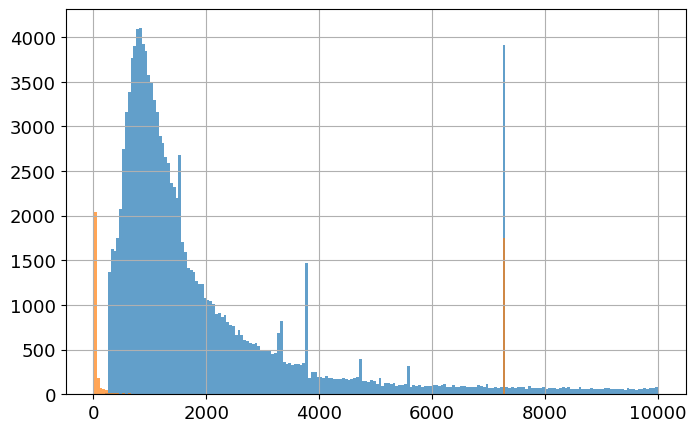

In [20]:
df_all_dsp0_cal_r005.trap_max.hist(bins=200, range=(10, 10000), alpha=0.7)
df_all_dsp0_tst_r006.trap_max.hist(bins=200, range=(10, 10000), alpha=0.7);

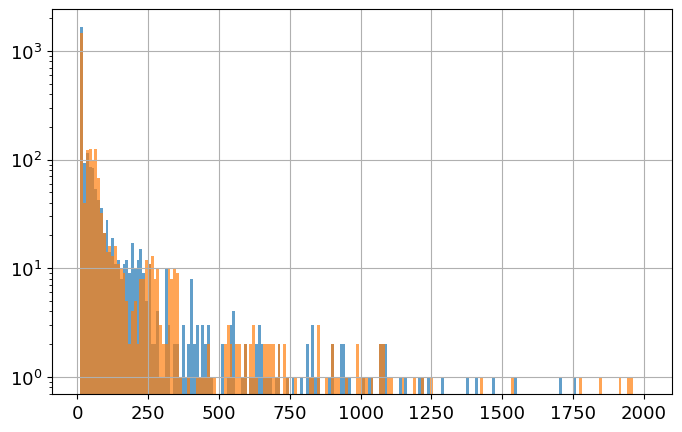

In [23]:
df_all_dsp0_tst_r006.trap_max.hist(bins=200, range=(10, 2000), alpha=0.7, log=True);
df_all_dsp1_tst_r006.trap_max.hist(bins=200, range=(10, 2000), alpha=0.7, log=True);